<a href="https://colab.research.google.com/github/ankitkrtiwari7/Creditcard_defaulter/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## **Importing some important Liberies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

In [57]:
#Importing all the required libraries and metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings("ignore")

## **Importing Data from google drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 4.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [5]:
df = pd.read_excel('/content/drive/MyDrive/creditcard/Copy of default of credit card clients.xls')

In [6]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [7]:
df.shape

(30001, 25)

so we have data of containing 30001 rows and 25 columns

#**Checking for null value.**

In [8]:
# checking if data contains any null value
df.isnull()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
#from above it bit difficult to find it has any null value or not so lets sum if it has any null value
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

 Data doesn't contains any value.

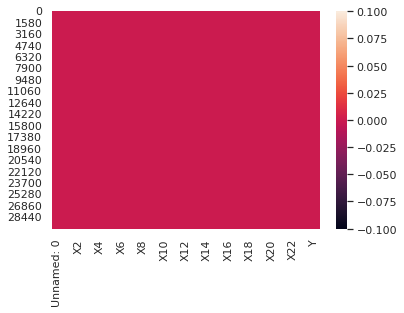

In [10]:
# to check null values by visualization method
sns.heatmap(df.isnull(),cbar=True) 

In [11]:
df.columns = df.iloc[0]

In [12]:
df.drop(labels=0,axis=0,inplace=True)

In [13]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [14]:
df.rename(columns={'default payment next month':'Defaulter'},inplace=True)


In [15]:
df.drop('ID',axis=1,inplace=True)

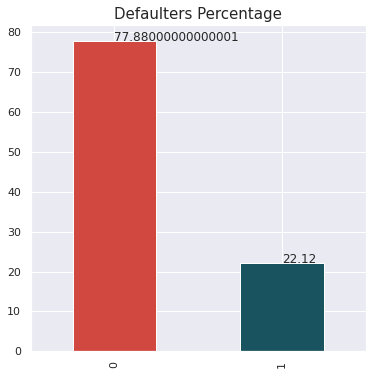

In [16]:
ax = df['Defaulter'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(6,6), color = ('#d14841','#195360'))

plt.title("Defaulters Percentage", fontsize=15)
for x,y in zip([0,1],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

**We have 22% defaulter and 78% non defaulter.**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  object
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  object
 5   PAY_0      30000 non-null  object
 6   PAY_2      30000 non-null  object
 7   PAY_3      30000 non-null  object
 8   PAY_4      30000 non-null  object
 9   PAY_5      30000 non-null  object
 10  PAY_6      30000 non-null  object
 11  BILL_AMT1  30000 non-null  object
 12  BILL_AMT2  30000 non-null  object
 13  BILL_AMT3  30000 non-null  object
 14  BILL_AMT4  30000 non-null  object
 15  BILL_AMT5  30000 non-null  object
 16  BILL_AMT6  30000 non-null  object
 17  PAY_AMT1   30000 non-null  object
 18  PAY_AMT2   30000 non-null  object
 19  PAY_AMT3   30000 non-null  object
 20  PAY_AMT4   30000 non-null  o

In [18]:
df.astype(int).describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


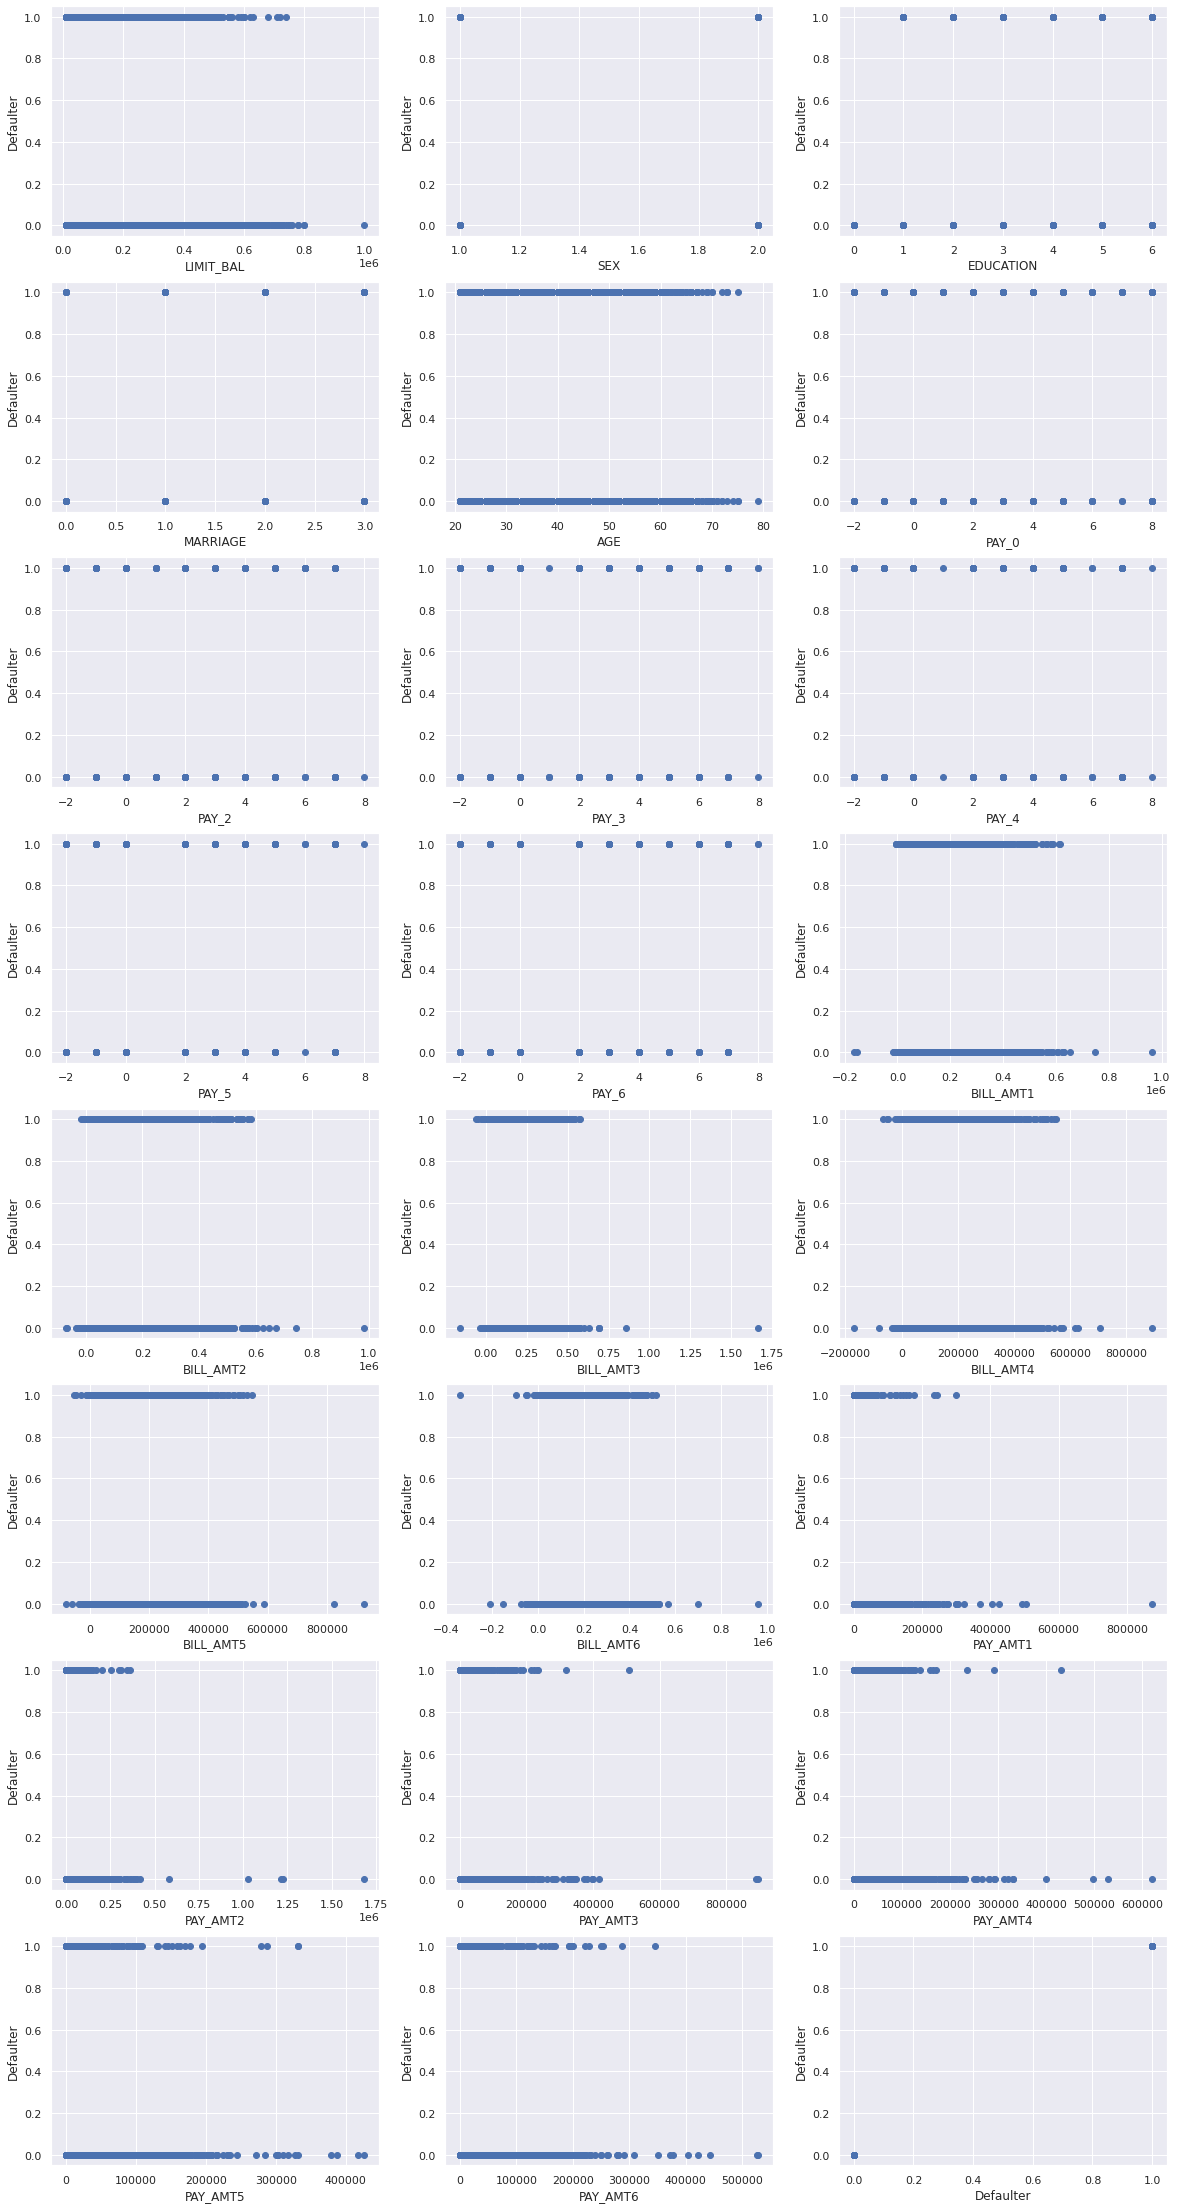

In [19]:
#Plotting the scatter plot
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in df:
  ax = plt.subplot(12, 3, plotnumber)
  plt.scatter(df[feature], df['Defaulter'])
  plt.xlabel(feature)
  plt.ylabel('Defaulter')
  plotnumber+=1

plt.show()

**From above plots its clear that non of feature is linearly related to defaulter.**

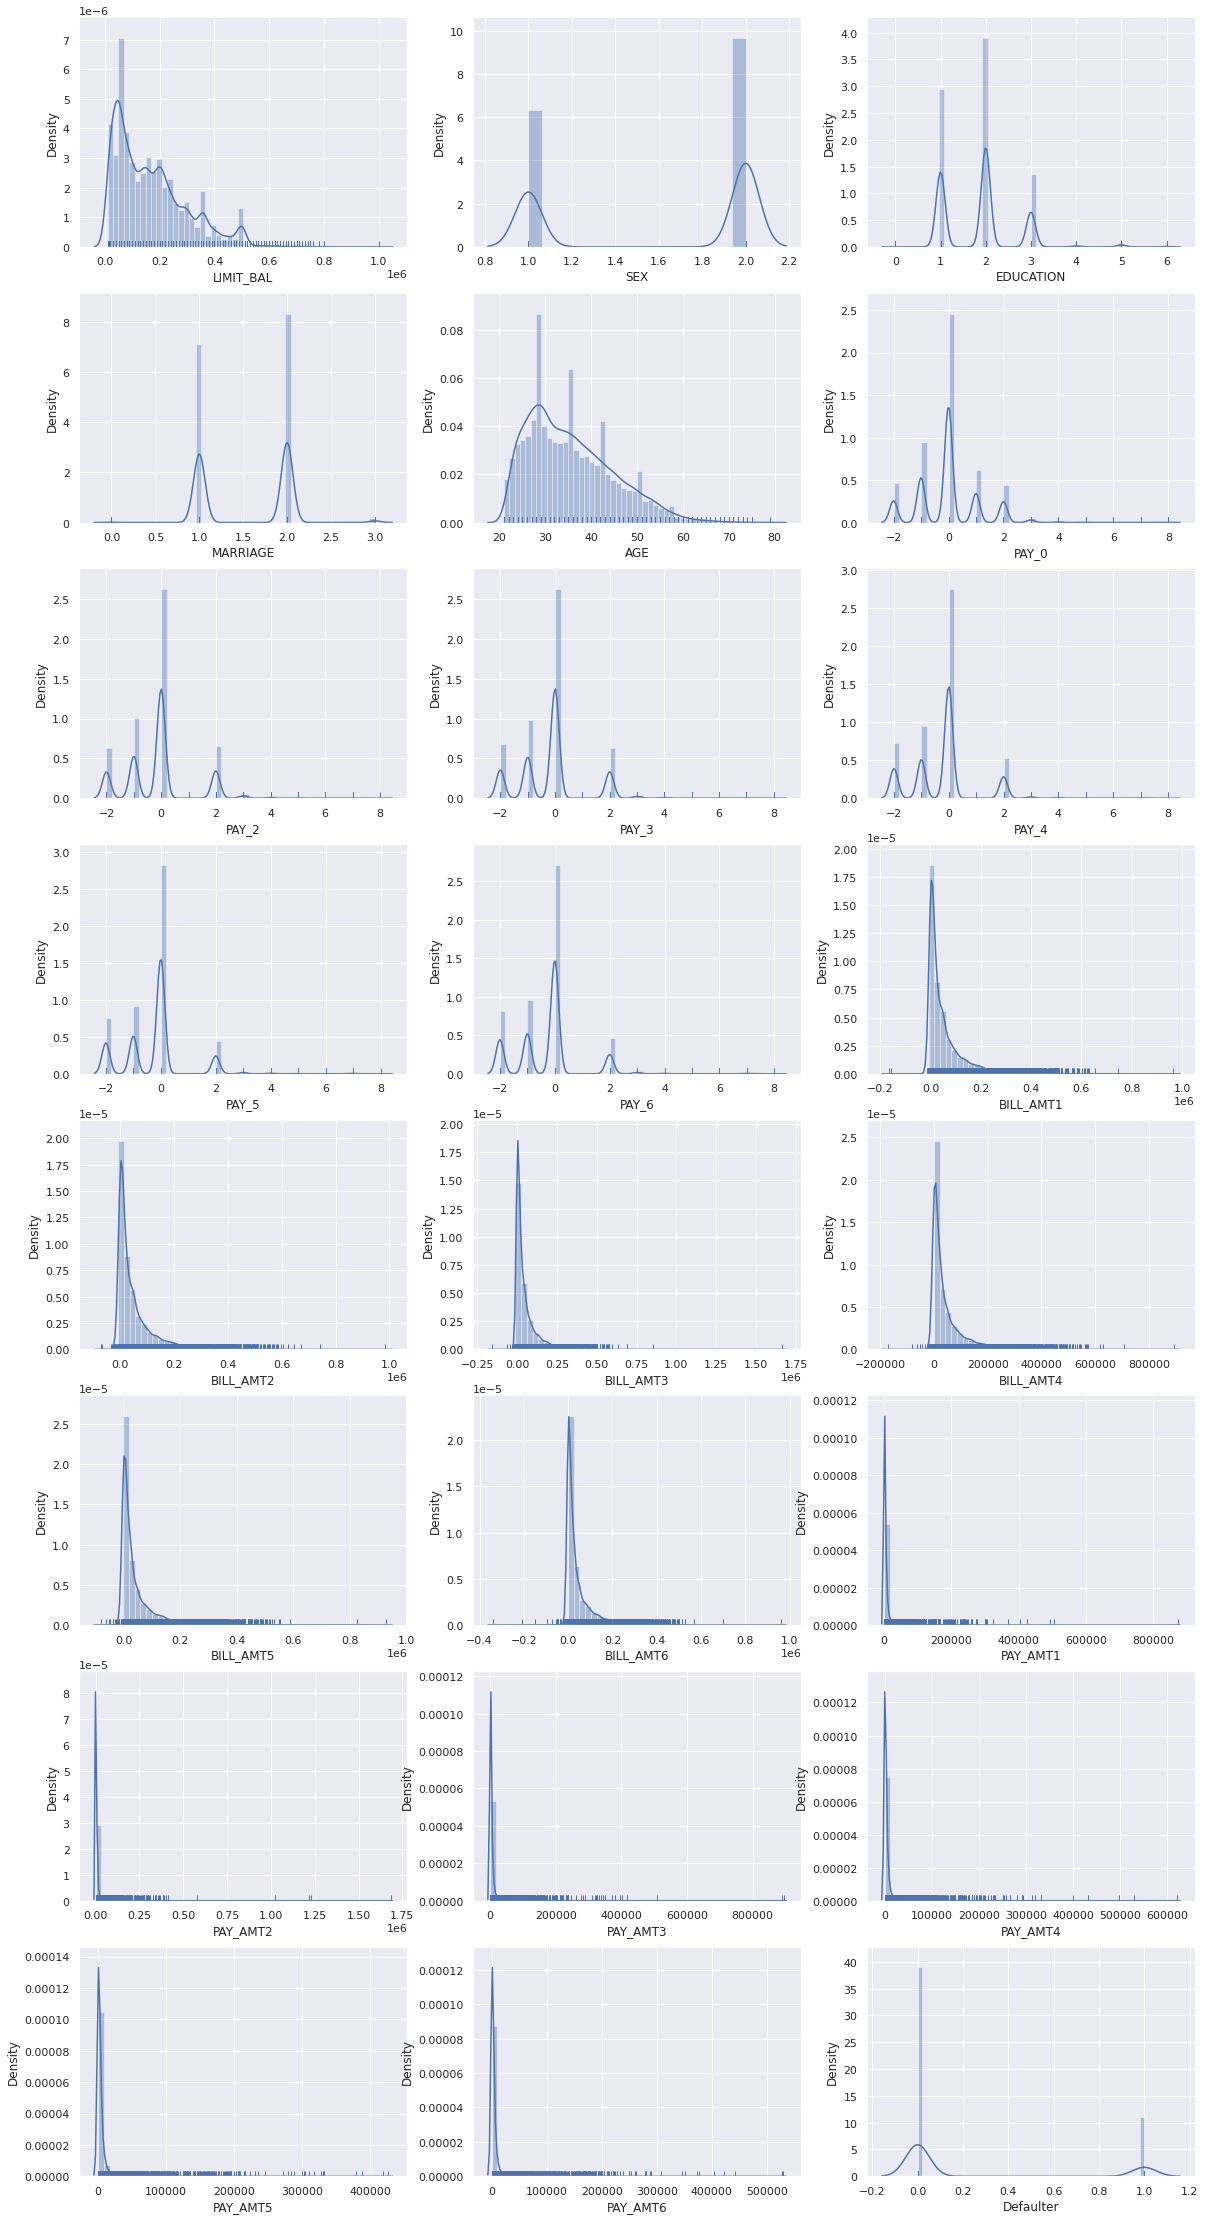

In [20]:

#Plotting distplots for all the columns
plt.figure(figsize = (20,60), facecolor = 'white')
plotnumber = 1
for feature in df:
  ax = plt.subplot(12, 3, plotnumber)
  sns.distplot(df[feature],kde=True , rug=True)
  plt.xlabel(feature)
  plotnumber+=1
  
 # plt.axvline(np.median(feature),color='b', linestyle='--')

plt.show()

From above distplot graph we can observe that some of data are positively sckewed. Such as LIMIT_BAL , BILL_AMT1 TO BILL_AMT6 .



**Plotting pairplot to check relationship of features with each other.**

In [21]:
df_new = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','Defaulter']]

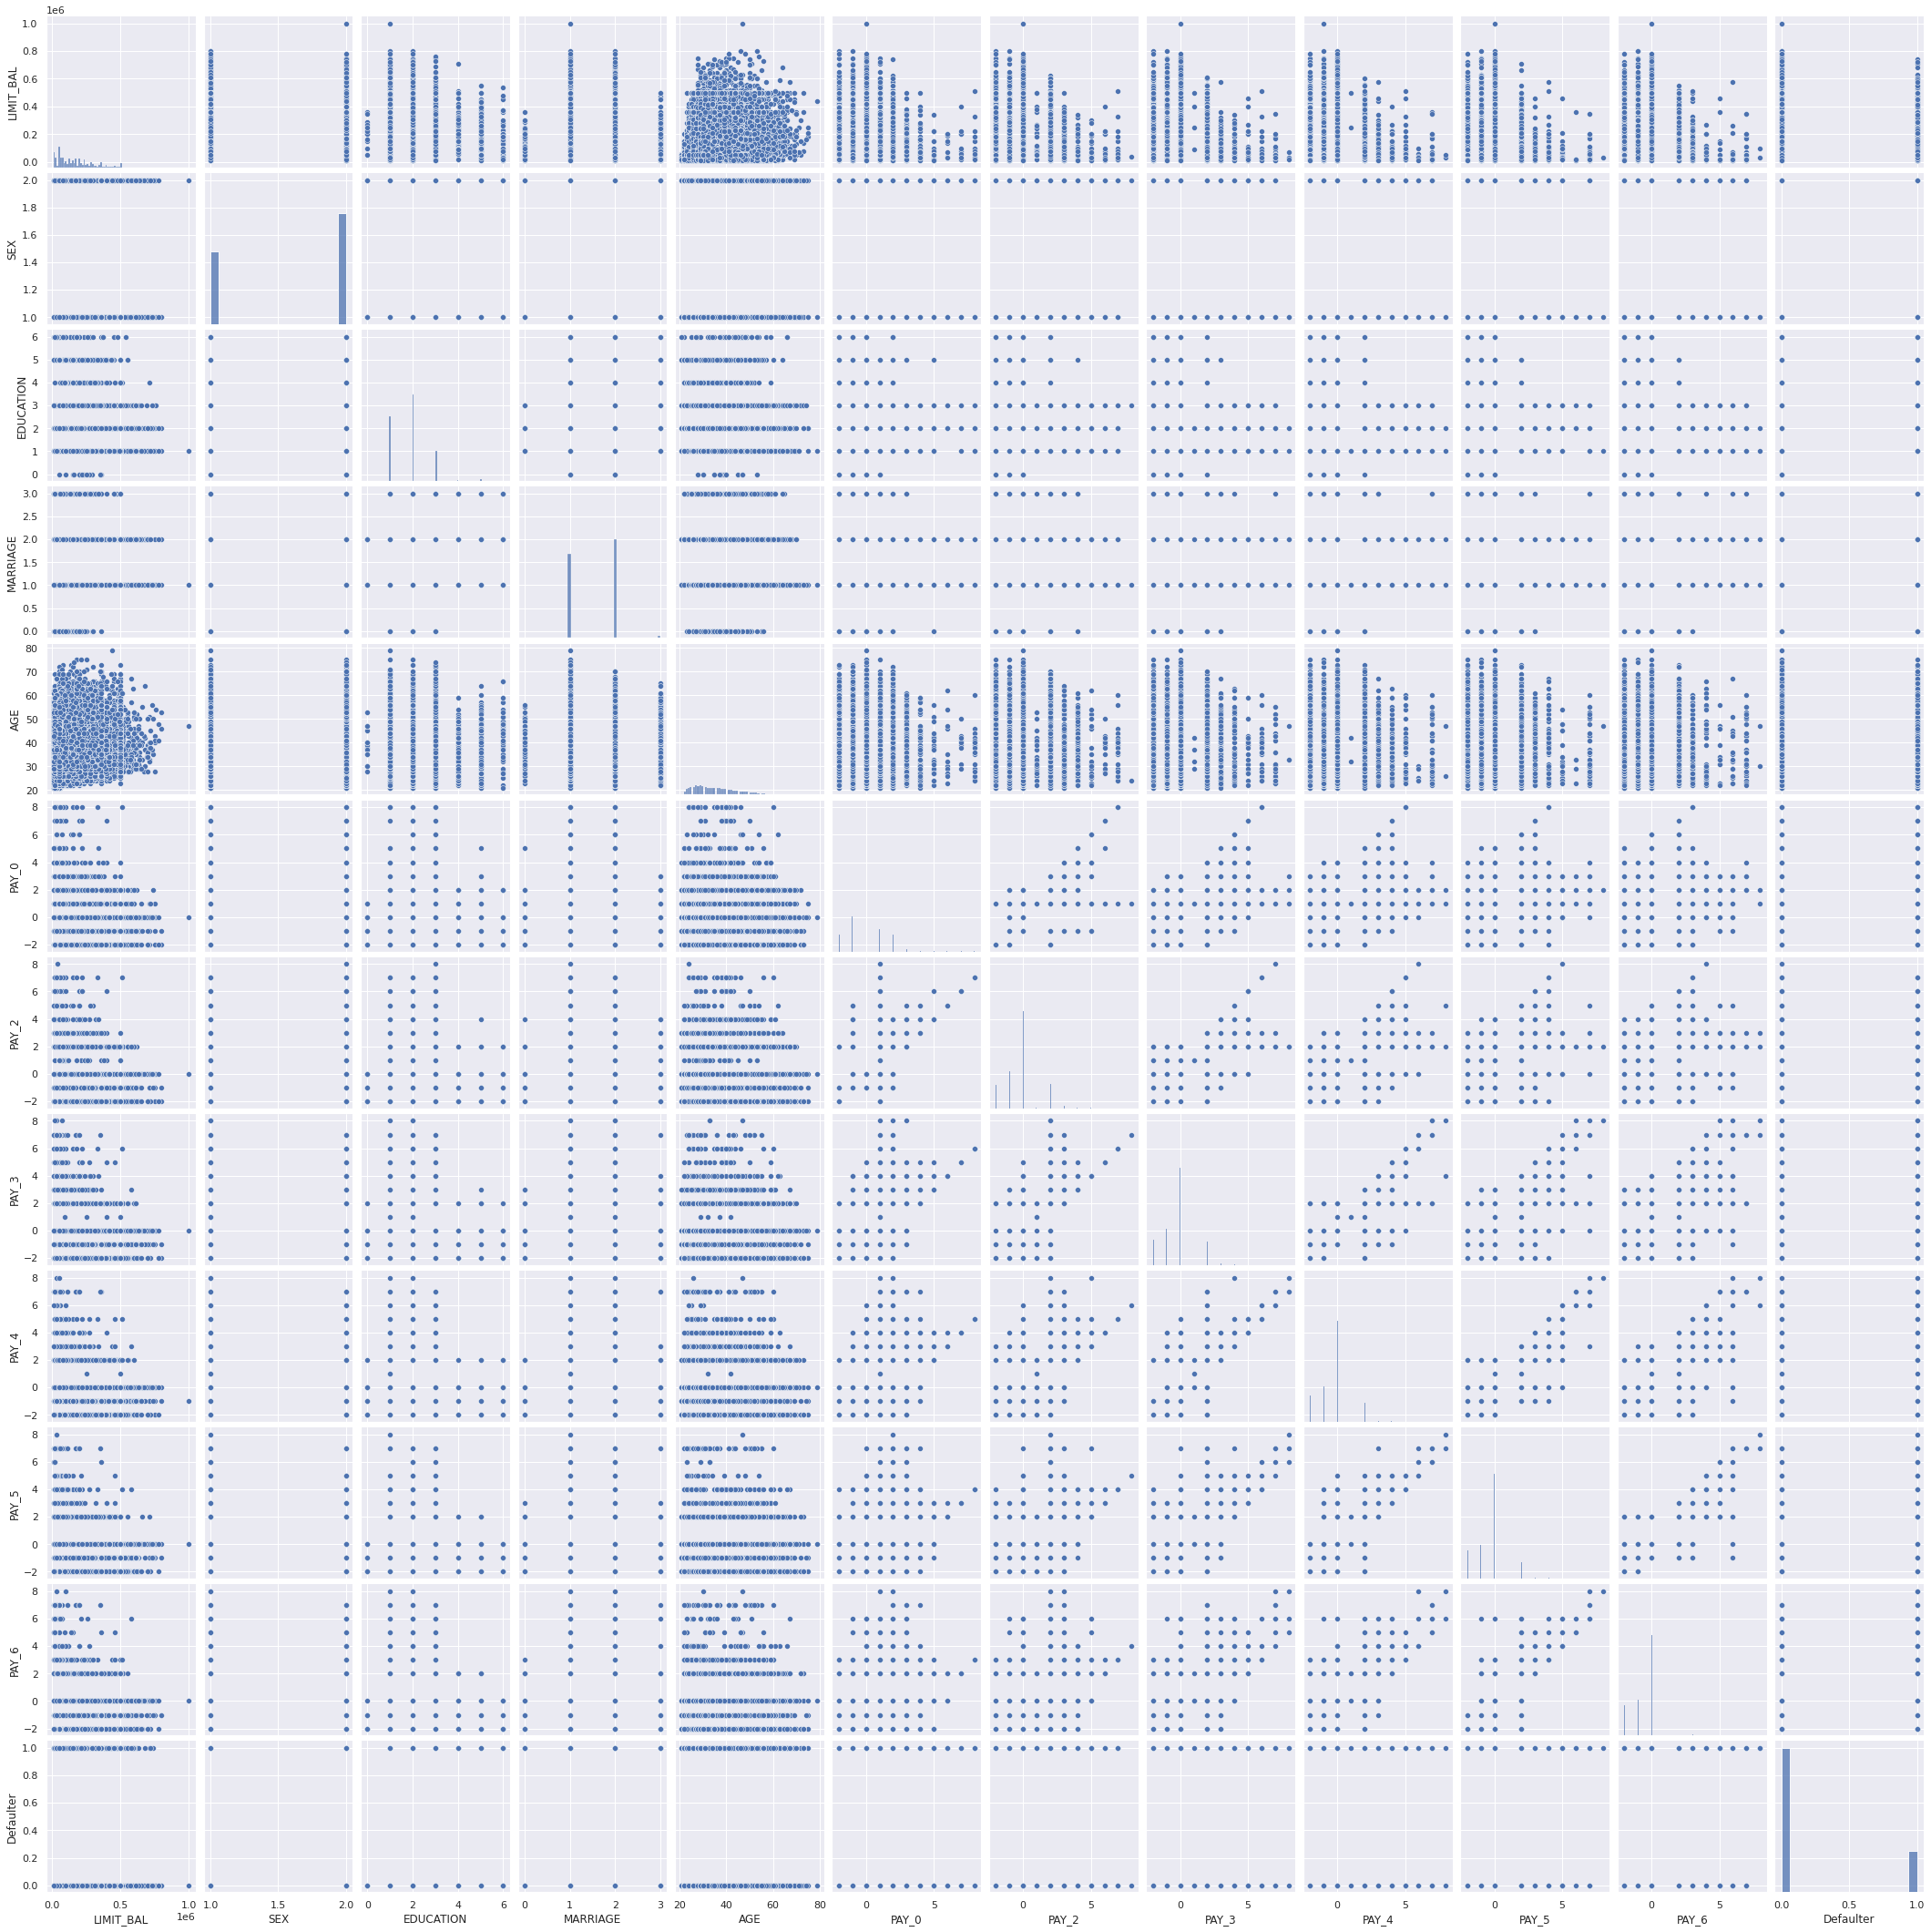

In [22]:
sns.pairplot(df_new)

In [23]:
# Import library for VIF
from sklearn.linear_model import LinearRegression
def calc_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [24]:
calc_vif(df , df)

,VIF,Tolerance
LIMIT_BAL,1.559410,0.641268
SEX,1.024337,0.976241
EDUCATION,1.126831,0.887445
MARRIAGE,1.231223,0.812200
AGE,1.276241,0.783551
PAY_0,1.996411,0.500899
PAY_2,3.176901,0.314772
PAY_3,3.658790,0.273314
PAY_4,4.287511,0.233236
PAY_5,4.725374,0.211623


As from above chart we can see that some of features in data are Multicollinear such as **BILL_AMT1 , BILL_AMT2 , BILL_AMT3 , BILL_AMT4 , BILL_AMT5 , BILL_AMT6** for analysis we cann't use linear alogorithem as we have Multicollinearity in data or we can drop them and perform our analysis with linear algorithem.

## **Checking which sex is most in defaulter list**

In [25]:
df['Defaulter']

1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: Defaulter, Length: 30000, dtype: object

**Checking defulter on the basis of sex**

In [26]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [27]:
df['SEX'][df['Defaulter']==1].value_counts()

2    3763
1    2873
Name: SEX, dtype: int64

In [28]:
sex = df['SEX'][df['Defaulter']==1] # creating dataframe on sex where defaulter ==1 

Text(0, 0.5, 'Defaulter')

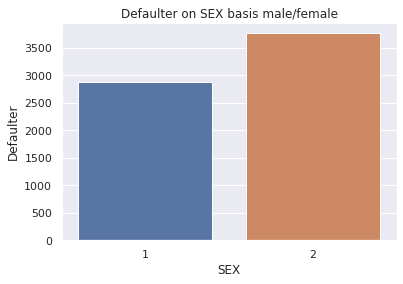

In [29]:
sns.countplot(sex)
plt.title('Defaulter on SEX basis male/female')
plt.ylabel('Defaulter')


**1 = male; 2 = female** From graph its clear that female are more in defaulter list then male. Out of 18112 female , 3763 are in defaulter list and out of 11888 male ,2873 are in defaulter list . 

## **Checking education level of defaulter**

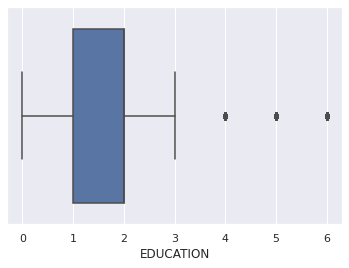

In [30]:
sns.boxplot(df['EDUCATION'])

In [31]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=object)

As we can see there are some missfilled data such as 0,5,6 so we can merge them to 4 = others

In [32]:
df['EDUCATION'] = np.where(df['EDUCATION']==0 , 4 , df['EDUCATION']) # meraging all missfilled data in 4
df['EDUCATION'] = np.where(df['EDUCATION']==5 , 4 , df['EDUCATION'])
df['EDUCATION'] = np.where(df['EDUCATION']==6 , 4 , df['EDUCATION'])

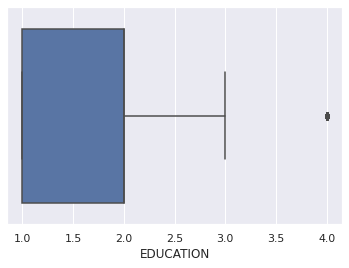

In [33]:
#after merging the outlier with 4 plotting boxplot
sns.boxplot(df['EDUCATION'])

In [34]:
df1=df['EDUCATION'][df['Defaulter']==1]



No handles with labels found to put in legend.


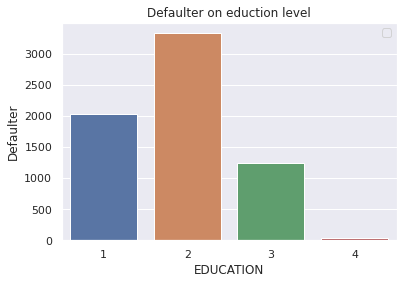

In [35]:
sns.countplot(df1 )
plt.ylabel('Defaulter')
plt.title('Defaulter on eduction level')
plt.legend()

**1 = graduate school; 2 = university; 3 = high school; 4 = others** From graph its clear that  University students  are most defaulter . Out of 14030 University student , 3330 are in defaulter list . Out of 10585 Graduate student , 2036 are in defaulter list . And out of 4917 high school student , 1237 are in defaulter list.

## **Checking defaulter on basis of marital status**

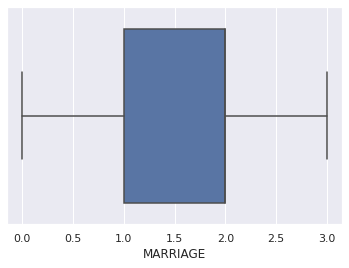

In [36]:
sns.boxplot(df['MARRIAGE'])

In [37]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=object)

we can see from above that marriage have some missfilled enteries . so for resolving this we can see this data as others.

In [38]:
df['MARRIAGE'] = np.where(df['MARRIAGE']== 0 , 3 , df['MARRIAGE'])

In [39]:
df3 = df['MARRIAGE'][df['Defaulter']==1] #creating dataframe on marriage == defaulter

In [40]:
df3.value_counts() #Defaulter list 

2    3341
1    3206
3      89
Name: MARRIAGE, dtype: int64

In [41]:
df['MARRIAGE'].value_counts() # actual value

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

No handles with labels found to put in legend.


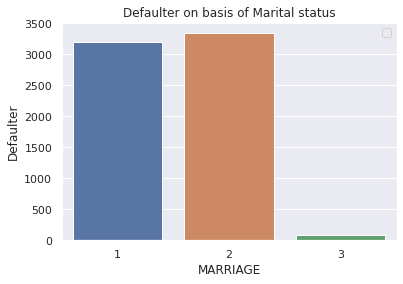

In [42]:
sns.countplot(df3)
plt.title('Defaulter on basis of Marital status')
plt.ylabel('Defaulter')
plt.legend()


**1 = married; 2 = single; 3 = others** . We can see from above graph that unmarried person are most in defaulter list . out of 15964 single person , 3341 are on defaulter list . out of 13659 married person , 3206 are in defaulter list . 

In [43]:
df4 = df['AGE'][df['Defaulter']==1]

Text(0.5, 1.0, 'Defaulter on Age basis')

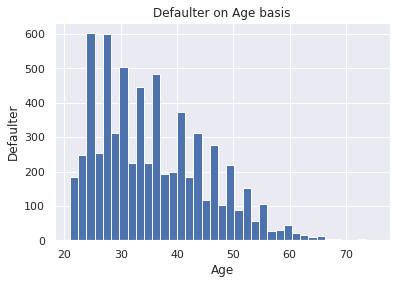

In [44]:
plt.hist(df4,bins='auto')
plt.xlabel('Age')
plt.ylabel('Defaulter')
plt.title('Defaulter on Age basis')

From above graph we can conclude that maximum of defaulters are from age 25-30 yrs and some are from 30-40 yrs .  We can also assume that young people are more often to be a defaulter. As they can be unemployed or can have low income and they spend more money .

#**Checking LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD**

**PLOTTING HISTOGRAM ON LIMIT BALANCE**

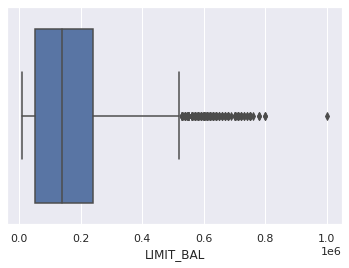

In [45]:
sns.boxplot(df['LIMIT_BAL'])

**Data contains some outlier . As its data from a bank we can work with data without removing them**

Text(0.5, 1.0, 'LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD')

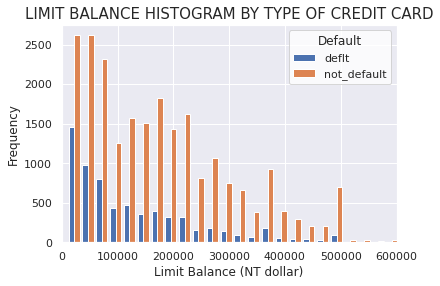

In [46]:
not_default = df['LIMIT_BAL'][df['Defaulter']==0]
deflt = df['LIMIT_BAL'][df['Defaulter']==1]
plt.hist([deflt,not_default],bins=40)
plt.xlim([0,600000])
plt.legend(['deflt', 'not_default'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)

**From above graph we can say that whose balance limit is upto 100000 are more defaulter . While whose limit is upto 20000-500000 are lesser in defaulter list.** 

In [47]:
calc_vif(df_new,df_new)

,VIF,Tolerance
LIMIT_BAL,1.209914,0.826505
SEX,1.022807,0.977701
EDUCATION,1.119725,0.893076
MARRIAGE,1.229518,0.813327
AGE,1.275556,0.783972
PAY_0,1.976225,0.506015
PAY_2,3.092789,0.323333
PAY_3,3.573463,0.279841
PAY_4,4.193457,0.238467
PAY_5,4.598010,0.217485


**Here we reomved some column and now we can go for model.

In [48]:
X = df.drop('Defaulter',axis=1)  
y = df['Defaulter']
y=y.astype('int')

In [49]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29999,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [50]:

from sklearn.model_selection import train_test_split 


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [95]:
def train_classification_model(model,X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)
  #model.coef_
  # Get the predicted probabilities
  train_preds = model.predict_proba(X_train)
  test_preds = model.predict_proba(X_test)
  # Get the predicted classes
  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)
  # Get the accuracy scores
  train_accuracy = accuracy_score(train_class_preds,y_train)
  test_accuracy = accuracy_score(test_class_preds,y_test)

  print("The accuracy on train data is ", train_accuracy)
  print("The accuracy on test data is ", test_accuracy)

  #plotting confusion metrix
  cm = confusion_matrix(y_train, train_class_preds)
  print(cm)

  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, cmap="YlOrBr", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default']) #annot=True to annotate cell
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.title("Confusion Matrix-{}".format(model))



In [98]:
logist = LogisticRegression(fit_intercept=True, max_iter=30000)

The accuracy on train data is  0.7787916666666667
The accuracy on test data is  0.7788333333333334
[[18691     0]
 [ 5309     0]]


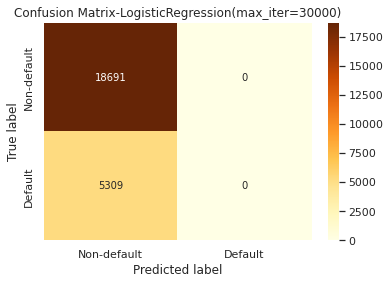

In [99]:
train_classification_model(logist,X_train,y_train,X_test,y_test)

In [91]:
def roc_curve(model):
  #define metrics
  y_pred_proba = model.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)

  #create ROC curve
  plt.plot(fpr,tpr,label="AUC="+str(auc))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

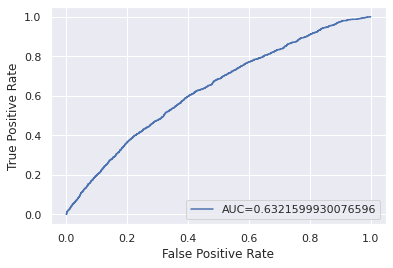

In [92]:
roc_curve(logist)

In [93]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

The accuracy on train data is  0.8200416666666667
The accuracy on test data is  0.8168333333333333
[[18049   642]
 [ 3677  1632]]


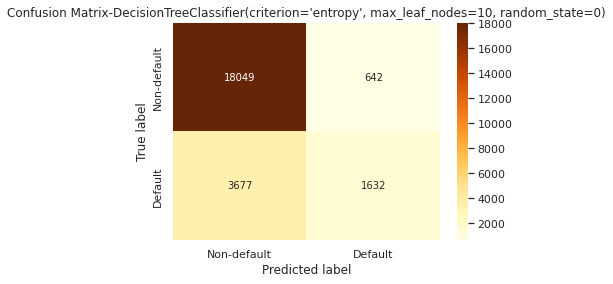

In [96]:
train_classification_model(decision_tree,X_train,y_train,X_test,y_test)

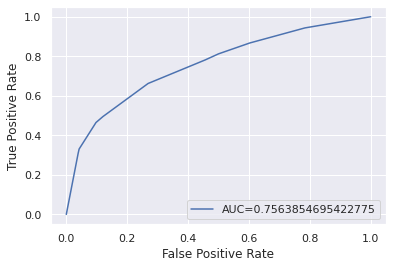

In [97]:
roc_curve(decision_tree)